In [88]:
# Imports
from ape_paths import wav_path
import os
import librosa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras import utils
import tensorflow as tf
from keras.utils import to_categorical

In [27]:
def extract_from_genres(root_dir, genre):
    mel_specs = []
    full_labels = []
    for file in os.scandir(root_dir):
        if file.is_dir() and file.name == genre:
            spects, labels = extract_mel_spectrogram(file, file.name)
            # Adding the mel spectrogram to the list
            mel_specs += spects
            # Extracting the label and adding it to the list
            # label = str(file).split('.')[0][11:]
            full_labels += labels
    return mel_specs, full_labels
    # # Converting the list or arrays to an array
    # X = np.array(mel_specs)
    
    

In [25]:
def extract_mel_spectrogram(genre_dir, label):
    '''
    This function takes in a directory of audio files in .wav format, computes the
    mel spectrogram for each audio file, reshapes them so that they are all the 
    same size, and stores them in a numpy array. 
    
    It also creates a list of genre labels and maps them to numeric values.
    
    Parameters:
    directory (int): a directory of audio files in .wav format
    
    Returns:
    X (array): array of mel spectrogram data from all audio files in the given
    directory
    y (array): array of the corresponding genre labels in numeric form
    '''
    
    # Creating empty lists for mel spectrograms and labels
    labels = []
    mel_specs = []
    
    
    # Looping through each file in the directory
    for file in os.scandir(genre_dir):
        # Don't process if not .mp3 file
        if file.name.endswith('.wav'):  
            # Loading in the audio file
            y, sr = librosa.core.load(file)
            
            # Extracting the label and adding it to the list
            # label = str(file).split('.')[0][11:]
            labels.append(label)

            # Computing the mel spectrograms
            spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
            spect = librosa.power_to_db(spect, ref=np.max)
            
            # Adjusting the size to be 128 x 660
            if spect.shape[1] != 660:
                spect.resize(128,660, refcheck=False)
                
            # Adding the mel spectrogram to the list
            mel_specs.append(spect)
    return mel_specs, labels

In [1]:
# Using the function to read and extract mel spectrograms from the GTZAN Genre Dataset audio files
genre_dict = {
        'Ambient Electronic': 0,
        'Chiptune': 1,
        'Classical': 2,
        'Country': 3,
        'Electronic': 4,
        'Folk': 5,
        'Hip-Hop': 6,
        'Indie-Rock': 7,
        'Jazz': 8,
        'Metal': 9,
        'Pop': 10,
        'Post-Rock': 11,
        'Psych-Rock': 12,
        'Punk': 13,
        'Reggae': 14,
        'Rock': 15,
        'Techno': 16,
        'Trip-Hop': 17
    }

KeyError: 0

In [28]:
X0, y0 = extract_from_genres(wav_path, 'Ambient Electronic')

In [29]:
X1, y1 = extract_from_genres(wav_path, 'Chiptune')

In [30]:
X2, y2 = extract_from_genres(wav_path, 'Classical')

In [38]:
X3, y3 = extract_from_genres(wav_path, 'Country')

In [39]:
X4, y4 = extract_from_genres(wav_path, 'Electronic')

In [40]:
X5, y5 = extract_from_genres(wav_path, 'Folk')

In [41]:
X6, y6 = extract_from_genres(wav_path, 'Hip-Hop')

In [42]:
X7, y7 = extract_from_genres(wav_path, 'Indie-Rock')

In [43]:
X8, y8 = extract_from_genres(wav_path, 'Jazz')

In [44]:
X9, y9 = extract_from_genres(wav_path, 'Metal')

In [45]:
X10, y10 = extract_from_genres(wav_path, 'Pop')

In [46]:
X11, y11 = extract_from_genres(wav_path, 'Post-Rock')

In [47]:
X12, y12 = extract_from_genres(wav_path, 'Psych-Rock')

In [48]:
X13, y13 = extract_from_genres(wav_path, 'Punk')

In [49]:
X14, y14 = extract_from_genres(wav_path, 'Reggae')

In [50]:
X15, y15 = extract_from_genres(wav_path, 'Rock')

In [51]:
X16, y16 = extract_from_genres(wav_path, 'Techno')

In [52]:
X17, y17 = extract_from_genres(wav_path, 'Trip-Hop')

In [61]:
X = X0 + X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17

In [75]:
y = y0 + y1 + y2 + y3 + y4 + y5 + y6 + y7 + y8 + y9 + y10 + y11 + y12 + y13 + y14 + y15 + y16 + y17

In [63]:
print(len(X), len(X[2]), len(X[2][0]))

7872 128 660


In [76]:
print(len(y))

7872


In [77]:
# Converting labels to numeric values
full_labels = pd.Series(y)
# print("Full labels: ", full_labels, type(full_labels))
label_dict = {
    'Ambient Electronic': 0,
    'Chiptune': 1,
    'Classical': 2,
    'Country': 3,
    'Electronic': 4,
    'Folk': 5,
    'Hip-Hop': 6,
    'Indie-Rock': 7,
    'Jazz': 8,
    'Metal': 9,
    'Pop': 10,
    'Post-Rock': 11,
    'Psych-Rock': 12,
    'Punk': 13,
    'Reggae': 14,
    'Rock': 15,
    'Techno': 16,
    'Trip-Hop': 17
}
y = full_labels.map(label_dict).values

In [65]:
# Play this
X = np.array(X)

In [94]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=.2)

In [102]:
# Checking the minimum value (the scale ranges from zero to some negative value) to see how we should scale the data
min_val = X_train.min()
print(min_val)

-80.0


In [103]:
# Scaling our data to be between 0 and 1 using the minimum value from above
X_train /= min_val
X_test /= min_val

In [104]:
# Reshaping images to be 128 x 660 x 1, where the 1 represents the single color channel
X_train = X_train.reshape(X_train.shape[0], 128, 660, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 660, 1)

In [105]:
print(y_train)
print(y_test)

[ 1  7 16 ...  4 12  2]
[6 1 1 ... 6 6 9]


In [106]:
# One hot encoding our labels
y_train = to_categorical(y_train, num_classes=18)
y_test = to_categorical(y_test, num_classes=18)

In [107]:
print(y_train)
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [108]:
#CNN
# Initializing a random seed for replication purposes
np.random.seed(12345)
tf.random.set_seed(123)

# Initiating an empty neural network
cnn_model = Sequential(name='cnn_1')

# Adding convolutional layer
cnn_model.add(Conv2D(filters=16,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=(128,660,1)))

# Adding max pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,4)))

# Adding convolutional layer
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(3,3),
                     activation='relu'))

# Adding max pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2,4)))

# Adding a flattened layer to input our image data
cnn_model.add(Flatten())

# Adding a dense layer with 64 neurons
cnn_model.add(Dense(64, activation='relu'))

# Adding a dropout layer for regularization
cnn_model.add(Dropout(0.25))

# Adding an output layer
cnn_model.add(Dense(18, activation='softmax'))

# Compiling our neural network
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Fitting our neural network
history = cnn_model.fit(X_train,
                        y_train, 
                        batch_size=16,
                        validation_data=(X_test, y_test),
                        epochs=15)

Epoch 1/15
394/394 [==============================] - 111s 279ms/step - loss: 2.6877 - accuracy: 0.2118 - val_loss: 2.1552 - val_accuracy: 0.3702
Epoch 2/15
394/394 [==============================] - 111s 282ms/step - loss: 2.1112 - accuracy: 0.3608 - val_loss: 1.8150 - val_accuracy: 0.4305
Epoch 3/15
394/394 [==============================] - 117s 297ms/step - loss: 1.8601 - accuracy: 0.4102 - val_loss: 1.7350 - val_accuracy: 0.4470
Epoch 4/15
394/394 [==============================] - 111s 282ms/step - loss: 1.7894 - accuracy: 0.4218 - val_loss: 1.6022 - val_accuracy: 0.4762
Epoch 5/15
394/394 [==============================] - 111s 282ms/step - loss: 1.6735 - accuracy: 0.4398 - val_loss: 1.6736 - val_accuracy: 0.4597
Epoch 6/15
394/394 [==============================] - 114s 290ms/step - loss: 1.5979 - accuracy: 0.4692 - val_loss: 1.5637 - val_accuracy: 0.4978
Epoch 7/15
394/394 [==============================] - 112s 285ms/step - loss: 1.5162 - accuracy: 0.4850 - val_loss: 1.6714 -

In [110]:
# Checking the model summary
cnn_model.summary()

Model: "cnn_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 658, 16)      160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 164, 16)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 162, 32)       4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 40, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2457664   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0     

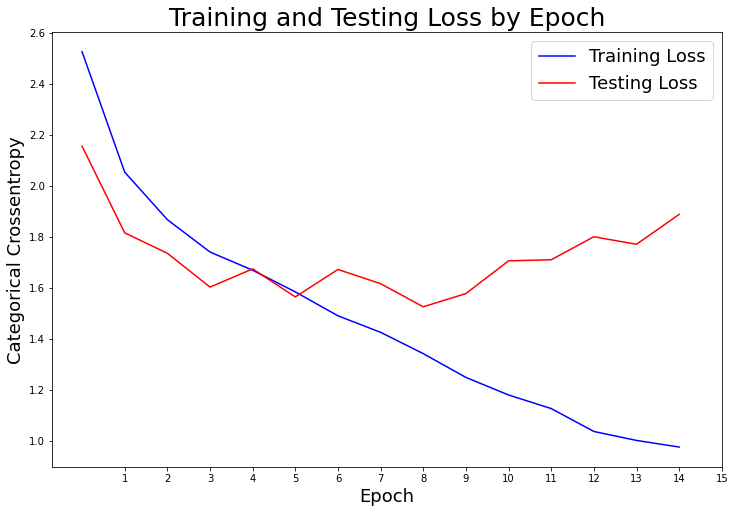

In [111]:
# The code in this cell was adapted from a lecture at General Assembly

# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='red')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(1,16), range(1,16))

plt.legend(fontsize = 18);

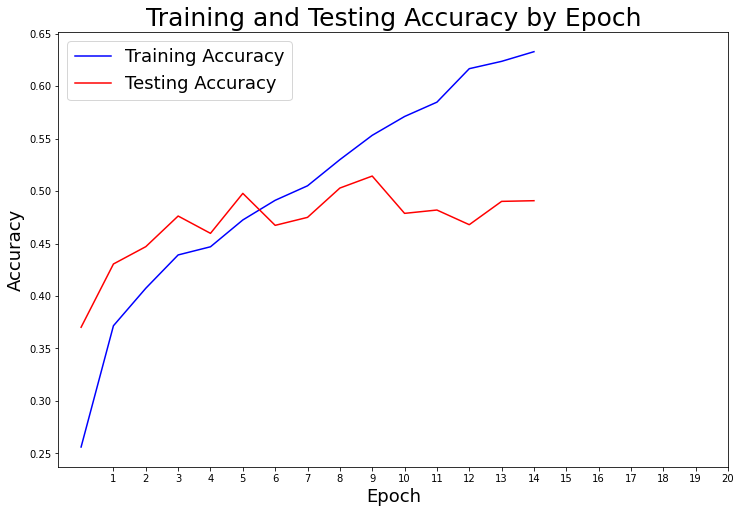

In [112]:
# The code in this cell was adapted from a lecture at General Assembly

# Check out our train accuracy and test accuracy over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Accuracy', color='blue')
plt.plot(test_loss, label='Testing Accuracy', color='red')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(1,21), range(1,21))

plt.legend(fontsize = 18);

In [113]:
test = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', test[0])
print('Test accuracy: ', test[1])

Test loss:  1.8874446153640747
Test accuracy:  0.4907936453819275


In [114]:
# Making predictions from the cnn model
predictions = cnn_model.predict(X_test, verbose=1)

50/50 [==============================] - 8s 145ms/step


In [115]:
## CONFUSION MATRIX
# Checking the number of targets per class
for i in range(18): 
    print(f'{i}: {sum([1 for target in y_test if target[i] == 1])}')

0: 89
1: 107
2: 94
3: 42
4: 103
5: 124
6: 350
7: 108
8: 37
9: 58
10: 32
11: 43
12: 72
13: 101
14: 34
15: 76
16: 61
17: 44


In [116]:
# Checking the number of predicted values in each class
for i in range(18): 
    print(f'{i}: {sum([1 for prediction in predictions if np.argmax(prediction) == i])}')

0: 78
1: 100
2: 100
3: 23
4: 91
5: 164
6: 433
7: 237
8: 26
9: 36
10: 9
11: 4
12: 31
13: 178
14: 5
15: 29
16: 21
17: 10


In [117]:
# Calculating the confusion matrix 
# row: actual
# columns: predicted
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predictions, 1))
conf_matrix

array([[ 35,   1,   3,   1,  12,   2,  11,  12,   2,   2,   0,   0,   2,
          1,   0,   0,   3,   2],
       [  2,  71,   0,   1,   9,   1,  11,   5,   2,   0,   0,   0,   0,
          2,   0,   0,   3,   0],
       [  6,   0,  76,   0,   0,   3,   0,   4,   3,   0,   1,   0,   0,
          0,   0,   1,   0,   0],
       [  0,   0,   0,   5,   0,  16,   2,  14,   1,   0,   0,   0,   0,
          1,   0,   3,   0,   0],
       [  4,   7,   3,   0,  27,   4,  34,   8,   2,   1,   0,   0,   0,
          2,   2,   0,   7,   2],
       [  0,   0,   7,   3,   1,  93,   0,  14,   4,   0,   2,   0,   0,
          0,   0,   0,   0,   0],
       [  8,   4,   1,   2,   8,   9, 298,  11,   2,   0,   0,   0,   0,
          1,   0,   1,   2,   3],
       [  6,   0,   2,   2,   2,   4,   7,  52,   1,   0,   0,   2,   3,
         22,   0,   5,   0,   0],
       [  1,   1,   5,   1,   1,  13,   2,   6,   6,   0,   1,   0,   0,
          0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,

In [118]:
# Creating a dataframe of the confusion matrix with labels for readability 
confusion_df = pd.DataFrame(conf_matrix)
confusion_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,35,1,3,1,12,2,11,12,2,2,0,0,2,1,0,0,3,2
1,2,71,0,1,9,1,11,5,2,0,0,0,0,2,0,0,3,0
2,6,0,76,0,0,3,0,4,3,0,1,0,0,0,0,1,0,0
3,0,0,0,5,0,16,2,14,1,0,0,0,0,1,0,3,0,0
4,4,7,3,0,27,4,34,8,2,1,0,0,0,2,2,0,7,2
5,0,0,7,3,1,93,0,14,4,0,2,0,0,0,0,0,0,0
6,8,4,1,2,8,9,298,11,2,0,0,0,0,1,0,1,2,3
7,6,0,2,2,2,4,7,52,1,0,0,2,3,22,0,5,0,0
8,1,1,5,1,1,13,2,6,6,0,1,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,12,1,15,0,0,4,19,0,6,0,0


In [121]:
# List of a subset of the genres
labels_dict = {
    0: 'Ambient Electronic',
    1: 'Chiptune',
    2: 'Classical',
    3: 'Country',
    4: 'Electronic',
    5: 'Folk',
    6: 'Hip-Hop',
    7: 'Indie-Rock',
    8: 'Jazz',
    9: 'Metal',
    10: 'Pop',
    11: 'Post-Rock',
    12: 'Psych-Rock',
    13: 'Punk',
    14: 'Reggae',
    15: 'Rock',
    16: 'Techno',
    17: 'Trip-Hop'
}

In [122]:
# Renaming rows and columns with labes
confusion_df = confusion_df.rename(columns=labels_dict)
confusion_df.index = confusion_df.columns
confusion_df

,Ambient Electronic,Chiptune,Classical,Country,Electronic,Folk,Hip-Hop,Indie-Rock,Jazz,Metal,Pop,Post-Rock,Psych-Rock,Punk,Reggae,Rock,Techno,Trip-Hop
Ambient Electronic,35,1,3,1,12,2,11,12,2,2,0,0,2,1,0,0,3,2
Chiptune,2,71,0,1,9,1,11,5,2,0,0,0,0,2,0,0,3,0
Classical,6,0,76,0,0,3,0,4,3,0,1,0,0,0,0,1,0,0
Country,0,0,0,5,0,16,2,14,1,0,0,0,0,1,0,3,0,0
Electronic,4,7,3,0,27,4,34,8,2,1,0,0,0,2,2,0,7,2
Folk,0,0,7,3,1,93,0,14,4,0,2,0,0,0,0,0,0,0
Hip-Hop,8,4,1,2,8,9,298,11,2,0,0,0,0,1,0,1,2,3
Indie-Rock,6,0,2,2,2,4,7,52,1,0,0,2,3,22,0,5,0,0
Jazz,1,1,5,1,1,13,2,6,6,0,1,0,0,0,0,0,0,0
Metal,1,0,0,0,0,0,0,12,1,15,0,0,4,19,0,6,0,0


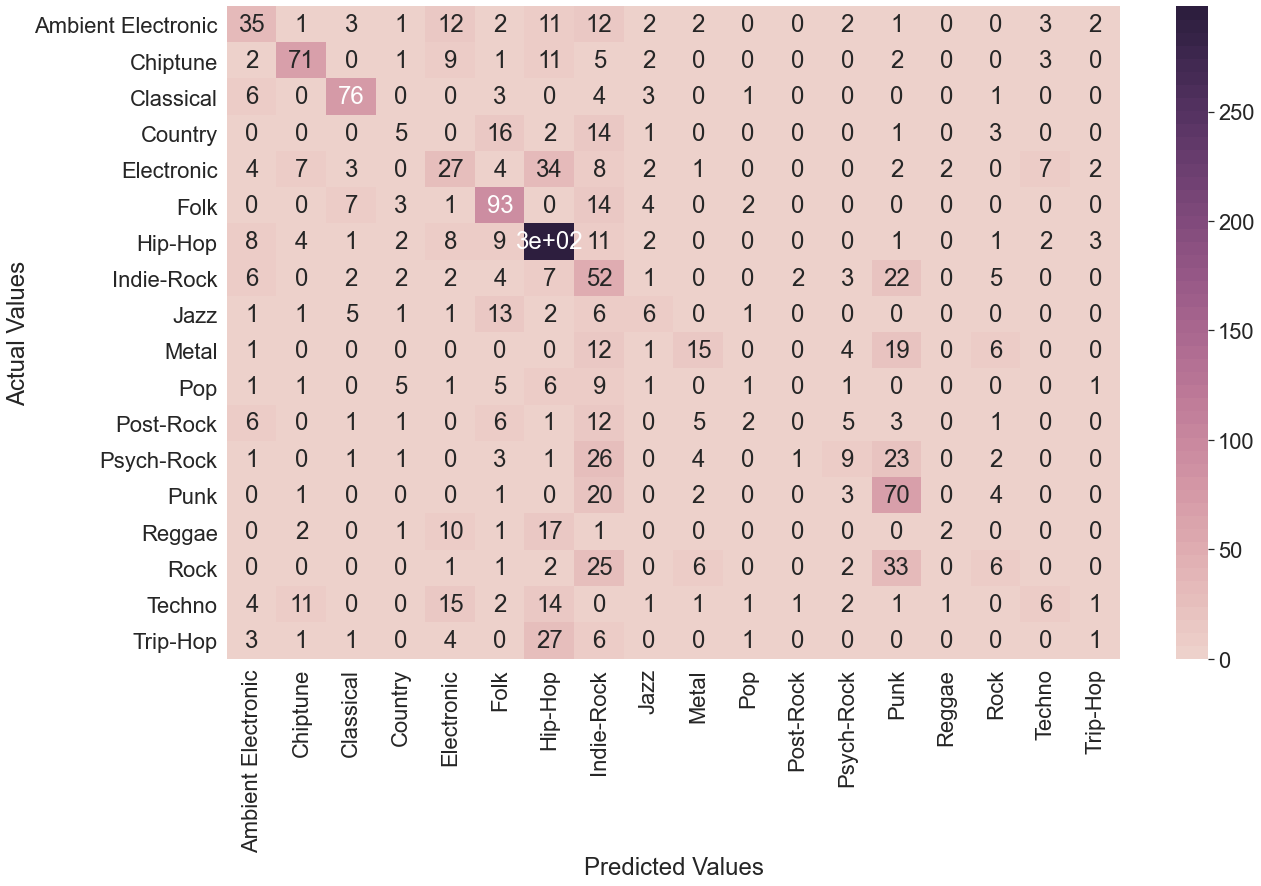

In [123]:
# Creating a heatmap for the confusion matrix for display
plt.figure(figsize= (20,12))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, annot=True, cmap=sns.cubehelix_palette(50));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

In [124]:
# from joblib import dump, load

# # swtich to model directory
# os.chdir(r"/Volumes/APE_External/Dropbox/_Classes/21_Winter/CS_467/Project_Folder/Music_Genre_Classification/Model")

# # create and save file
# joblib_file = "model_030921.joblib"
# dump(cnn_model, joblib_file)

TypeError: cannot pickle 'weakref' object

In [125]:
from keras.models import load_model

cnn_model.save('/Volumes/APE_External/Dropbox/_Classes/21_Winter/CS_467/Project_Folder/Music_Genre_Classification/Model/model_030921.h5')